In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Загрузка фото и перевод в черно-белое и RGB пространсто

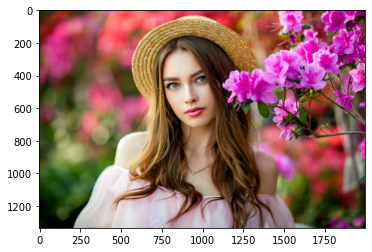

In [2]:
image_path = 'data/photo3.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)

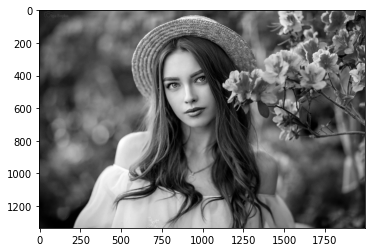

In [3]:
plt.imshow(gray_image, cmap='gray')

### Распознавания лица

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

face_gap=0.1

for (x, y, w, h) in faces:
    gap_x = int(w * face_gap)
    gap_y = int(h * face_gap)
    
    x -= gap_x
    y -= gap_y
    w += 2 * gap_x
    h += 2 * gap_y
    
    face_region = image[y:y+h, x:x+w]

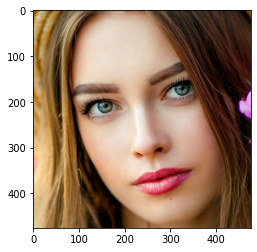

In [5]:
plt.imshow(face_region)

### Получение границ объектов с помощью метода Canny

In [6]:
edges = cv2.Canny(face_region, threshold1=50, threshold2=100)

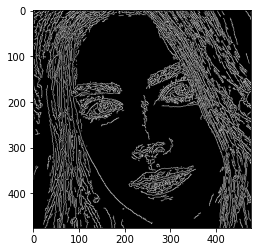

In [7]:
plt.imshow(edges, cmap='gray')

### Нахождение угловых точек

In [8]:
corner_points = cv2.goodFeaturesToTrack(cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY),
                                        maxCorners=1000, qualityLevel=0.01, minDistance=4)
corner_points = corner_points.astype(int)


for corner in corner_points:
    x, y = corner.ravel()
    cv2.circle(edges, (x, y), 2, (255, 255, 255))

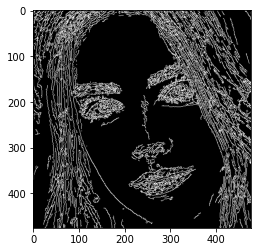

In [9]:
plt.imshow(edges, cmap='gray')

### Морфологическая операция наращивания

In [10]:
kernel = np.ones((5, 5), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

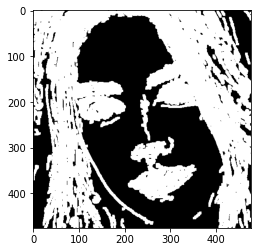

In [11]:
plt.imshow(edges, cmap='gray')

### Сглаживание краев изображения гауссовским фильтром 

In [12]:
edges = cv2.GaussianBlur(edges, (5, 5), 0)

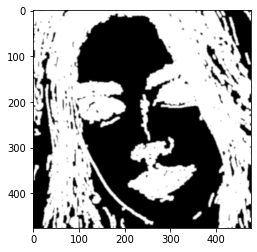

In [13]:
plt.imshow(edges, cmap='gray')

### Получение нормализованного изображения M

In [14]:
M = edges.astype(np.float32)
cv2.normalize(M, M, 0, 1, cv2.NORM_MINMAX)

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.04705883, 0.05882353,
        0.0627451 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

### Сглаживание изображения лица гауссовским фильтром для получения F1

In [15]:
F1 = cv2.GaussianBlur(face_region, (7, 7), 0)

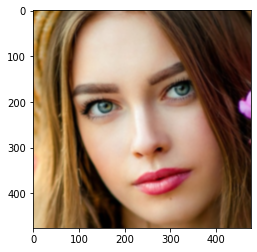

In [16]:
plt.imshow(F1)

### Повышение насыщенности и четкости для получения F2

In [17]:
F2 = cv2.cvtColor(face_region, cv2.COLOR_RGB2HSV)
F2 = F2.astype(float)

saturation_factor = 1.3

F2[:, :, 1] = F2[:, :, 1] * saturation_factor
F2[:, :, 1][F2[:, :, 1] > 255] = 255
F2 = F2.astype(np.uint8)
F2 = cv2.cvtColor(F2, cv2.COLOR_HSV2RGB)

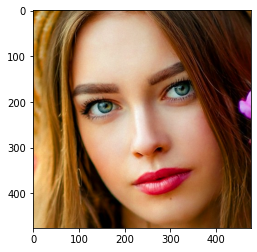

In [18]:
plt.imshow(F2)

In [19]:
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

F2 = cv2.filter2D(F2, -1, sharpening_kernel)

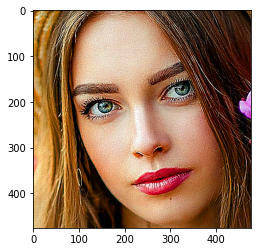

In [20]:
plt.imshow(F2)

### Применение фильтра

In [21]:
M_3D = np.stack([M] * 3, axis=-1)

In [22]:
Result = M_3D * F2 + (1 - M_3D) * F1
Result = Result.astype(np.uint8)

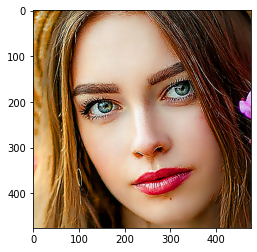

In [23]:
plt.imshow(Result)